<a href="https://colab.research.google.com/github/music-ai-644/AI_Study_2022/blob/main/Chapter3-4_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter3-4 선형 회귀를 위한 뉴런 만들기 

## 문제 해결을 위한 당뇨병 환자 데이터 준비
1. 데이터셋 불러오기 

In [3]:
from sklearn.datasets import load_diabetes

In [4]:
diabetes = load_diabetes()

In [5]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


2. 데이터셋 살펴보기

In [6]:
diabetes.data[:3]  # numpy 슬라이싱은 문서 참조 

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [7]:
diabetes.feature_names  # 나이(age) 성별(sex) 체질량지수(bmi) 혈압(bp), 

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [8]:
x = diabetes.data[:, 2]  # 전체 샘플을 선택 (: 은 all의 의미) 하고 3번째 열(bmi)를 가져옴 
y = diabetes.target  # 혈당량 

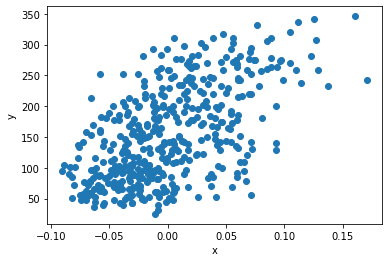

In [9]:
import matplotlib.pyplot as plt 
plt.scatter (x, y) 
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [40]:
import torch 
import torch.nn as nn 


class Neuron(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Linear(1, 1)
    self._set_optimizer() 
    self._set_loss()

  def _set_optimizer(self):
    self.optim = torch.optim.Adam(self.model.parameters(), 1e-2)

  def _set_loss(self):
    self.criterion = nn.L1Loss()
    # https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html 참조 
    
  def forward(self, x):
    y = self.model(x)
    return y 

  def _forward(self, x):
    y = self.forward(x)
    return y

  def predict(self, x):
    pred = self._forward(x)
    return pred
  
  def calculate_loss(self, x, y):
    loss = self.criterion(x, y)
    return loss

  def train(self, x, y, epochs=100):
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        x_i = torch.FloatTensor([x_i])
        y_i = torch.FloatTensor([y_i])
        self.model.zero_grad()
        self.optim.zero_grad()
        output = self._forward(x_i)
        loss = self.criterion(output, y_i)
        loss.backward()
        self.optim.step()

In [48]:
neuron = Neuron()

Text(0, 0.5, 'y')

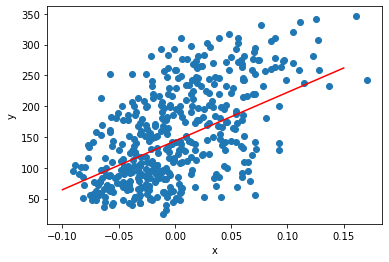

In [46]:
neuron.train(x, y, 100) 
plt.scatter(x, y)
neuron_w = neuron.model.weight.detach().numpy()[0]
neuron_b = neuron.model.bias.detach().numpy()[0]
pt1 = (-0.1, -0.1 * neuron_w + neuron_b)
pt2 = (0.15, 0.15 * neuron_w + neuron_b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

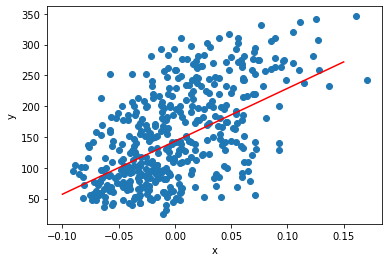

In [47]:
neuron.train(x, y, 100) 
plt.scatter(x, y)
neuron_w = neuron.model.weight.detach().numpy()[0]
neuron_b = neuron.model.bias.detach().numpy()[0]
pt1 = (-0.1, -0.1 * neuron_w + neuron_b)
pt2 = (0.15, 0.15 * neuron_w + neuron_b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r')
plt.xlabel('x')
plt.ylabel('y')